In [1]:
!pip install pycaret

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached retrying-1.3.3.tar.gz (10 kB)


  Using cached sqlparse-0.4.1-py3-none-any.whl (42 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=2f9cf637ded167f9f0dbc3ea5bf3faada76dceb6f8db05e670c255cf5447e725
  Stored in directory: c:\users\kerem\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=7cbeb16c5b36ba41fd7322c9cfe53b3ef1d675e22c5ca1a090fa42eb2f8dabcb
  Stored in directory: c:\users\kerem\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb0

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sub   = pd.read_csv('gender_submission.csv')

In [4]:
from pycaret.classification import *

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

,Description,Value
0,session_id,2392
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8236,0.8748,0.7470,0.8038,0.7700,0.6274,0.6330,0.1680
gbc,Gradient Boosting Classifier,0.8188,0.8775,0.7143,0.8142,0.7565,0.6134,0.6210,0.0700
rf,Random Forest Classifier,0.8156,0.8673,0.7513,0.7798,0.7610,0.6115,0.6163,0.1810
lda,Linear Discriminant Analysis,0.8076,0.8648,0.7190,0.7780,0.7439,0.5908,0.5951,0.0110
ridge,Ridge Classifier,0.8028,0.0000,0.7150,0.7719,0.7380,0.5809,0.5861,0.0100
lr,Logistic Regression,0.8012,0.8618,0.7272,0.7595,0.7398,0.5796,0.5829,0.6640
ada,Ada Boost Classifier,0.8011,0.8580,0.7470,0.7534,0.7468,0.5835,0.5871,0.0720
et,Extra Trees Classifier,0.7947,0.8344,0.7385,0.7456,0.7380,0.5697,0.5741,0.1650
dt,Decision Tree Classifier,0.7788,0.7741,0.7510,0.7216,0.7293,0.5435,0.5509,0.0090
knn,K Neighbors Classifier,0.7209,0.7667,0.6002,0.6623,0.6248,0.4045,0.4094,0.0360


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2392, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [12]:
lgbm  = create_model('lightgbm') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7937,0.8758,0.8400,0.7000,0.7636,0.5832,0.5908
1,0.8095,0.8195,0.7200,0.7826,0.7500,0.5966,0.5979
2,0.7619,0.8137,0.7200,0.6923,0.7059,0.5060,0.5063
3,0.8226,0.9095,0.7500,0.7826,0.7660,0.6232,0.6236
4,0.8226,0.8651,0.6667,0.8421,0.7442,0.6112,0.6209
5,0.8387,0.9337,0.8333,0.7692,0.8000,0.6652,0.6667
6,0.8871,0.9583,0.8333,0.8696,0.8511,0.7602,0.7607
7,0.8548,0.8520,0.6667,0.9412,0.7805,0.6767,0.6992
8,0.7581,0.8243,0.6800,0.7083,0.6939,0.4940,0.4943
9,0.8871,0.8957,0.7600,0.9500,0.8444,0.7575,0.7692


In [14]:
#lgbm = tune_model('lightgbm')

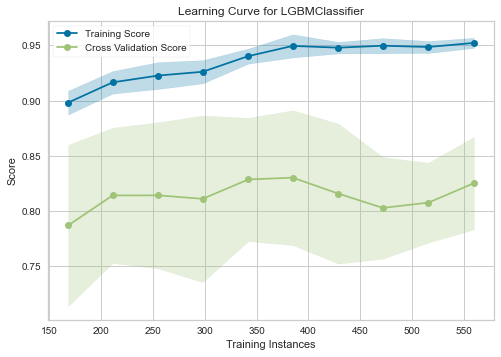

In [15]:
plot_model(estimator = lgbm, plot = 'learning')

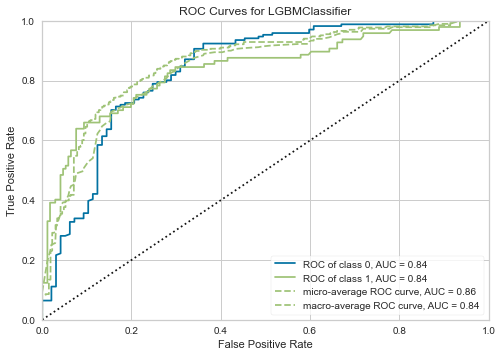

In [16]:
plot_model(estimator = lgbm, plot = 'auc')

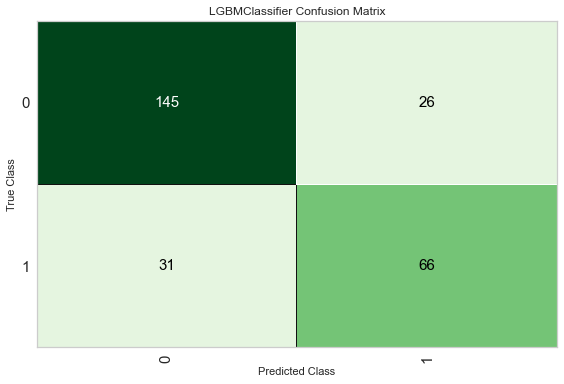

In [17]:
plot_model(estimator = lgbm, plot = 'confusion_matrix')

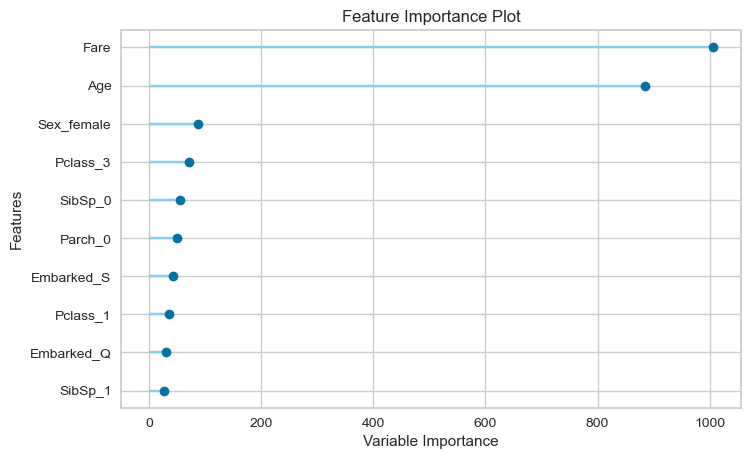

In [18]:
plot_model(estimator = lgbm, plot = 'feature')

In [19]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
!pip install shap

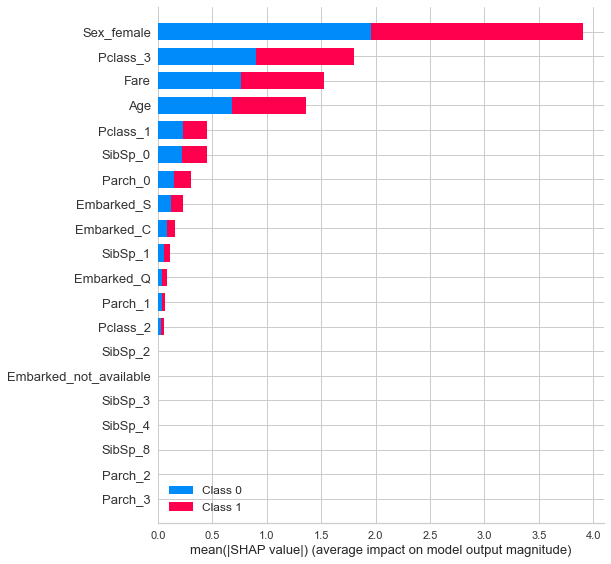

In [22]:
interpret_model(lgbm)

In [23]:
predict_model(lgbm, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.9817
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.6482
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.6308
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.9941
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.8557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.9910
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9930
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.9951
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.9910


In [24]:
predictions = predict_model(lgbm, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.9817
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.6482
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.6308
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.9941
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.8557


In [25]:
sub['Survived'] = round(predictions['Score']).astype(int)
sub.to_csv('submission.csv',index=False)
sub.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


In [28]:
logr  = create_model('lr');      
       

#blending 3 models
blend = blend_models(estimator_list=[lgbm,logr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9063,0.8800,0.7857,0.8302,0.7076,0.7110
1,0.7460,0.8042,0.7200,0.6667,0.6923,0.4766,0.4777
2,0.7937,0.8295,0.6400,0.8000,0.7111,0.5537,0.5620
3,0.8387,0.9150,0.7917,0.7917,0.7917,0.6601,0.6601
4,0.7742,0.9013,0.5417,0.8125,0.6500,0.4930,0.5151
5,0.8871,0.9435,0.8750,0.8400,0.8571,0.7639,0.7643
6,0.8548,0.9605,0.7917,0.8261,0.8085,0.6917,0.6921
7,0.8387,0.8838,0.6250,0.9375,0.7500,0.6379,0.6664
8,0.7742,0.8081,0.6800,0.7391,0.7083,0.5246,0.5259
9,0.8871,0.9049,0.7200,1.0000,0.8372,0.7542,0.7781
